# Bank Fraud Detection
Authors: Alec Beland, Owen Milke, Owen Davis, Kane, Issac

## Introduction

https://www.kaggle.com/datasets/marusagar/bank-transaction-fraud-detection/data

This dataset is a collection of banking transactions from LOL Bank Pvt. Ltd. that we found on Kaggle. It will be used to detect fradulent activities in said transactions.

The dataset has many parameters, each of which will be analyzed, explored, and correlated with the possibility of fraud based on said transaction. All parameters are self explanatory, and include customer demographics (gender, age, state, city, etc.), transaction specifiers (transaction date, time, amount, etc.), and specific banking specifiers (balance, bank_branch, etc.), along with noting if the current transaction was fraudulent or not (1 or 0), with Is_Fraud.

Some of our inital motivating questions include:
- Which variables are most correlated to bank fraud?
- How accurately can we predict fraudulent activity with machine learning?
- When is fraudulent activity most likely to occur? Are there certain merchants or devices more likely to be targeted?


## Data Cleaning

In [1]:
import pandas as pd

# Read in full csv
fraud_df = pd.read_csv("Bank_Transaction_Fraud_Detection.csv")

# Drop unnecessary columns
fraud_df = fraud_df.drop(
                        ['Customer_ID', 'Customer_Name', 'Transaction_ID',
                         'Merchant_ID', 'Transaction_Description', 'Customer_Email', 
                         'Customer_Contact', 'Transaction_Currency'], 
                        axis=1)

# Switch Is_Fraud's location to first column
is_fraud = fraud_df.pop('Is_Fraud')
fraud_df.insert(0, 'Is_Fraud', is_fraud)

# Standardize Date
fraud_df['Transaction_Date'] = pd.to_datetime(fraud_df['Transaction_Date'], dayfirst=True, errors='coerce').dt.date
# Standardize Time
fraud_df['Transaction_Time'] = pd.to_datetime(fraud_df['Transaction_Time'], format='%H:%M:%S', errors='coerce').dt.time

# Make into new csv
fraud_df.to_csv('Cleaned_Fraud.csv', index=False)

## Exploratory Analysis

In [2]:
# Loading Cleaned Data Set and Imports
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')
df = pd.read_csv("Cleaned_Fraud.csv")

## Overall Amount of Bank Fraud

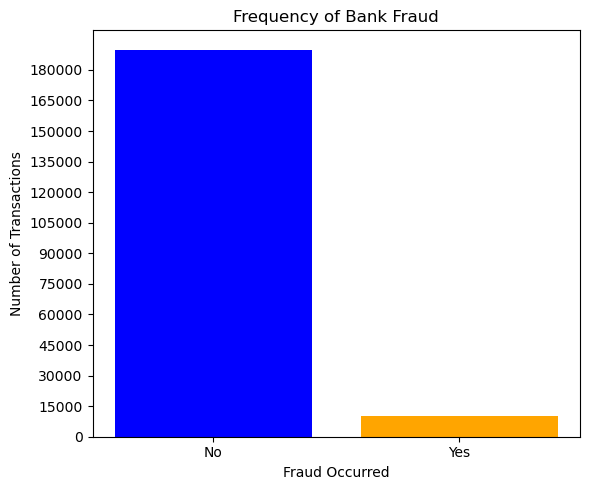

In [3]:
fraud_counts = df['Is_Fraud'].value_counts().sort_index()
fraud_labels = {0: 'No', 1: 'Yes'}
labels = [fraud_labels.get(i, str(i)) for i in range(len(fraud_counts))]

plt.figure(figsize=(6, 5))
plt.bar(labels, fraud_counts.values, color=['blue', 'orange'])

plt.title('Frequency of Bank Fraud')
plt.xlabel('Fraud Occurred')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, fraud_counts.max() + 1, 15000))
plt.ylim(bottom=0)
plt.tight_layout()

plt.show()

### Fraudrate by Age Group

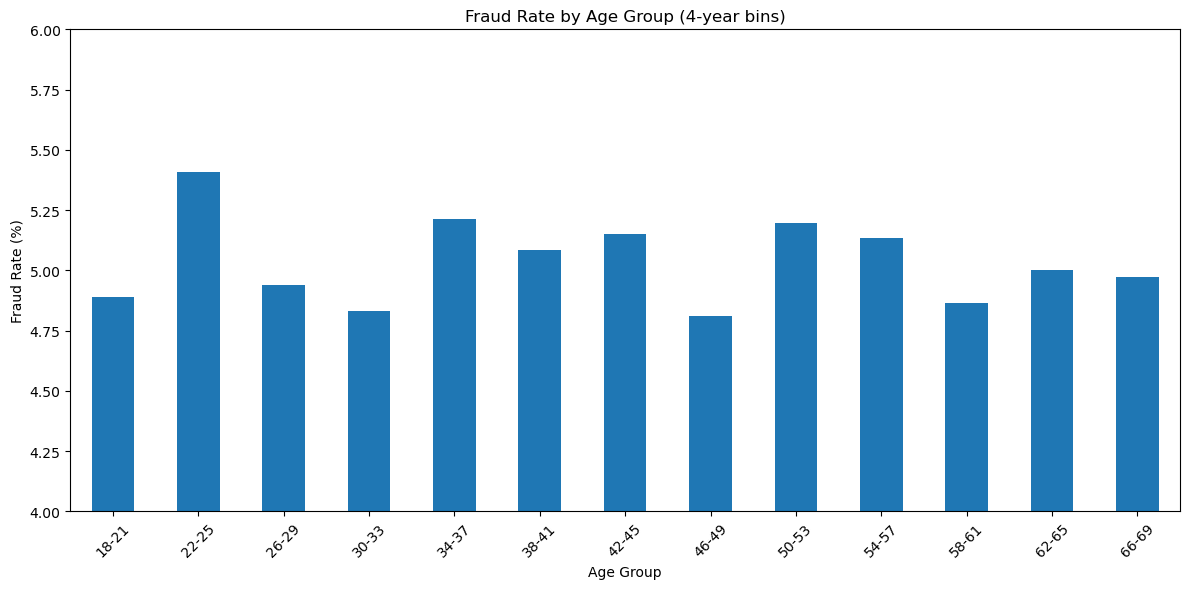

In [4]:
# Create 4-year bins from 18 to 70
bins = list(range(18, 71, 4))  # 18, 22, 26, ..., 66, 70
labels = [f'{i}-{i+3}' for i in bins[:-1]]

# Cut the Age column into those bins
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate fraud rate per age group
fraud_rate_by_age = df.groupby('Age_Group')['Is_Fraud'].mean() * 100  # convert to percentage

# Plot the fraud rate
plt.figure(figsize=(12, 6))
fraud_rate_by_age.plot(kind='bar')

plt.title('Fraud Rate by Age Group (4-year bins)')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Age Group')
plt.ylim(4,6)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Fraud Rate by Age Group Summary

This bar chart visualizes the percentage of fraudulent transactions across 4-year age intervals:

- Fraud rates generally range between **4.5% and 5.5%**.
- Slight peaks are seen in the **22–25**, **34–37**, and **50–53** age groups.
- No strong correlation is observed between age and fraud rate, suggesting that **age alone may not be a reliable predictor of fraud**.



### Fraud by State (Ordered by Income)

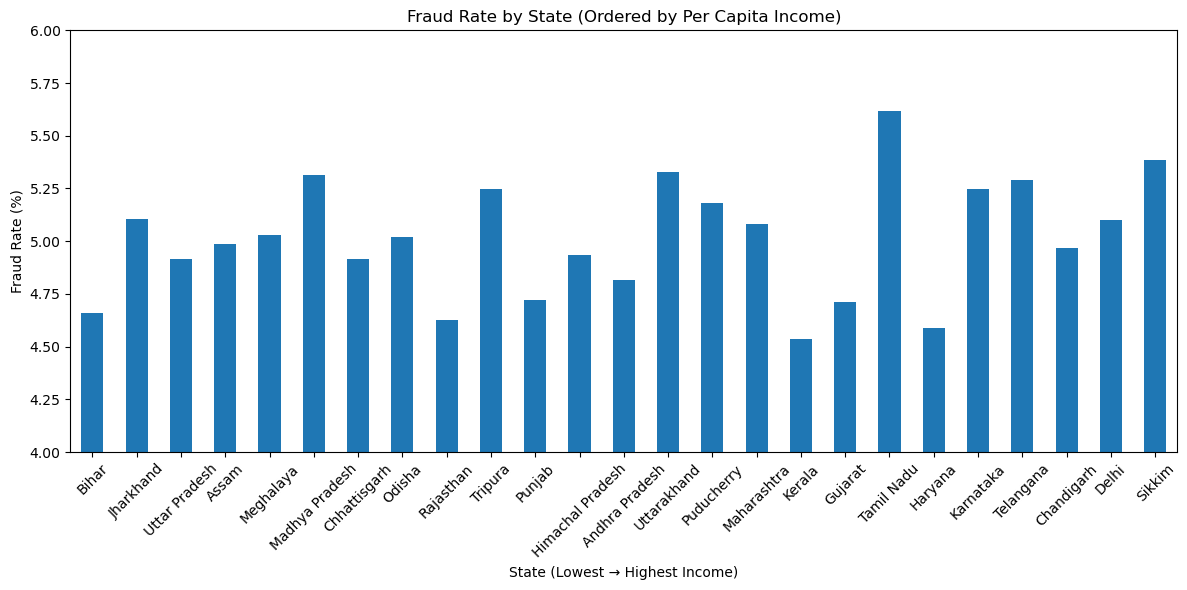

In [5]:
# Manually create a dictionary of per capita income by state (₹)
income_data = {
    'Bihar': 60337,
    'Jharkhand': 105274,
    'Uttar Pradesh': 114514,
    'Assam': 135787,
    'Meghalaya': 136948,
    'Jammu and Kashmir': 142138,
    'Madhya Pradesh': 142565,
    'Chhattisgarh': 147361,
    'Odisha': 163101,
    'Rajasthan': 167964,
    'Tripura': 177723,
    'Punjab': 196505,
    'Himachal Pradesh': 235199,
    'Andhra Pradesh': 242479,
    'Uttarakhand': 260201,
    'Puducherry': 262166,
    'Maharashtra': 277603,
    'Kerala': 281001,
    'Gujarat': 297722,
    'Tamil Nadu': 315220,
    'Haryana': 325759,
    'Karnataka': 332926,
    'Telangana': 356564,
    'Chandigarh': 399654,
    'Delhi': 461910,
    'Sikkim': 587743,
}

# Convert to DataFrame
income_df = pd.DataFrame.from_dict(income_data, orient='index', columns=['Per_Capita_Income'])

# Join with fraud rate by state
fraud_rate_by_state = df.groupby('State')['Is_Fraud'].mean() * 100  # percentage
fraud_and_income = pd.concat([fraud_rate_by_state, income_df], axis=1).dropna()

# Sort by income (poorest to richest)
fraud_and_income_sorted = fraud_and_income.sort_values(by='Per_Capita_Income')

# Plot fraud rate by state ordered by income
plt.figure(figsize=(12, 6))
fraud_and_income_sorted['Is_Fraud'].plot(kind='bar')

plt.title('Fraud Rate by State (Ordered by Per Capita Income)')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('State (Lowest → Highest Income)')
plt.ylim(4, 6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Fraud Rate by State (Ordered by Per Capita Income) Summary

This bar chart shows the fraud rate by state, ordered from **lowest to highest per capita income**:

- States like **Sikkim**, **Delhi**, and **Tamil Nadu** show some of the **highest fraud rates**, despite having higher income levels.
- States like **Bihar**, **Odisha**, and **Kerala** show **lower fraud rates**, even with lower average incomes.
- Overall, there is **no clear relationship between income level and fraud rate**, suggesting that **factors beyond economic status** may be driving fraud trends.



### Fraud Rate by Gender 

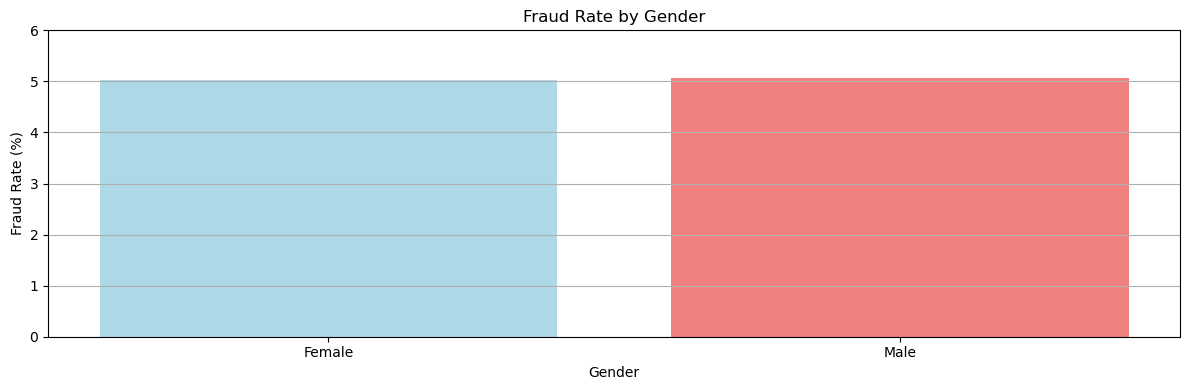

In [6]:
# Calculate fraud rate by gender
fraud_by_gender = df.groupby("Gender")["Is_Fraud"].mean() * 100  # convert to %

# Plot
plt.figure(figsize=(12, 4))
plt.bar(fraud_by_gender.index, fraud_by_gender.values, color=["lightblue", "lightcoral"])
plt.title("Fraud Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Fraud Rate (%)")
plt.ylim(0, 6)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


#### Fraud Rate by Gender Summary

This bar chart displays the percentage of fraudulent transactions for each gender.

- The fraud rate is nearly identical between **females** and **males**, both around **5%**.
- Based on the second chart (transaction count by gender), the **total number of transactions is roughly the same** for both genders.
- This suggests that **gender does not appear to be a significant factor** in predicting fraud rate within this dataset.


### Percentage of Fraud by Transaction Type

<Figure size 800x600 with 0 Axes>

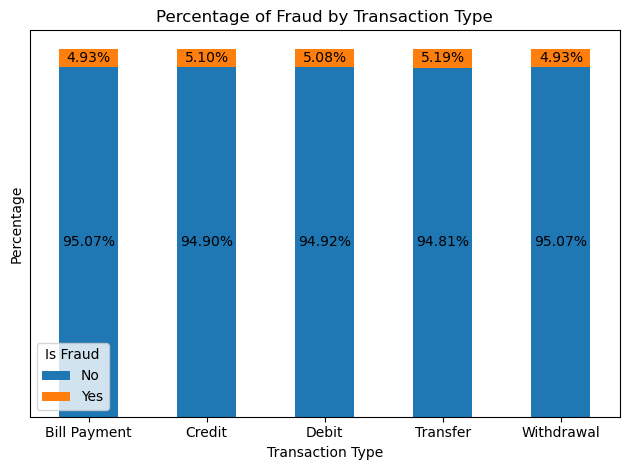

In [7]:
fraud_labels = {0: 'No', 1: 'Yes'}
plt.figure(figsize=(8, 6))
tx_counts = (df.assign(Is_Fraud=lambda x: x['Is_Fraud'].map(fraud_labels))
             .groupby(['Transaction_Type', 'Is_Fraud']).size().unstack(fill_value=0))
tx_pct = tx_counts.div(tx_counts.sum(axis=1), axis=0)
ax = tx_pct.plot.bar(
    stacked=True,
    title="Percentage of Fraud by Transaction Type",
    ylabel='Percentage',
    xlabel='Transaction Type',
    rot=0,
)
for container in ax.containers:
    ax.bar_label(container, 
                labels=[f'{x:.2%}' if x > 0.01 else '' for x in container.datavalues],
                label_type='center',
                fontsize=10)
ax.legend(title="Is Fraud")
ax.set_yticks([])
plt.tight_layout()
plt.show()

#### Summary:
The most likely transaction type to be fraudulent is a balance transfer, however, being only 0.26% more likely than the least likely fraud methods of bill payments and withdrawals, transaction type may not be an effective field for predicting fraud.

### Fraud Count by Merchant Category

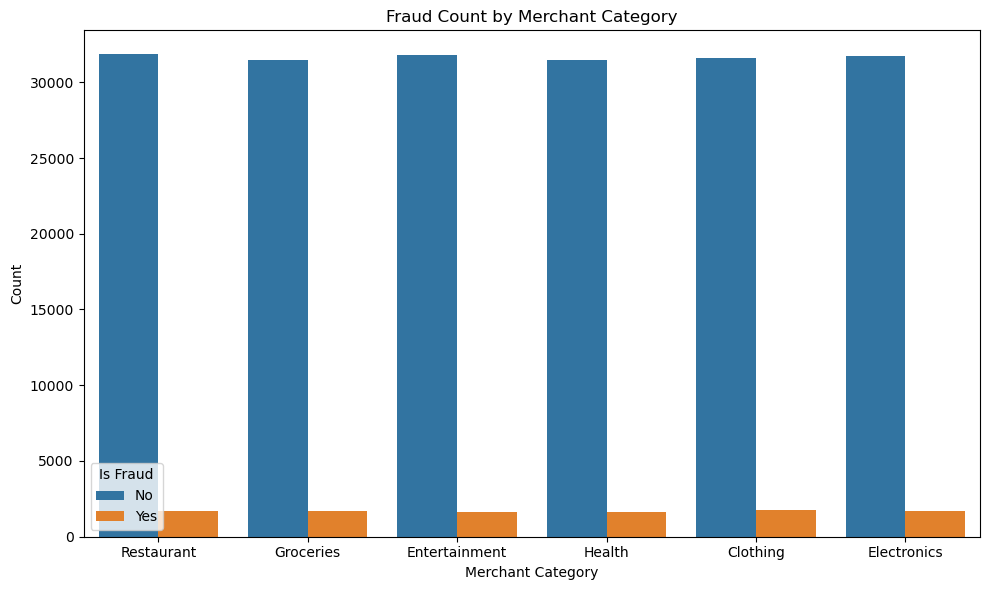

In [8]:
fraud_labels = {0: 'No', 1: 'Yes'}
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df.assign(Is_Fraud=lambda x: x['Is_Fraud'].map(fraud_labels)),
    x="Merchant_Category",
    hue="Is_Fraud"
)
ax.set_title("Fraud Count by Merchant Category")
ax.set_xlabel('Merchant Category')
ax.set_ylabel('Count')
ax.tick_params(axis='x')
ax.legend(title="Is Fraud", loc='lower left')
plt.tight_layout()
plt.show()

#### Summary:
Overall fraud counts for each recorded merchant category seem to be largely the same, making the field unreliable in predicting fraud.

### Account Balance Distribution by Fraud

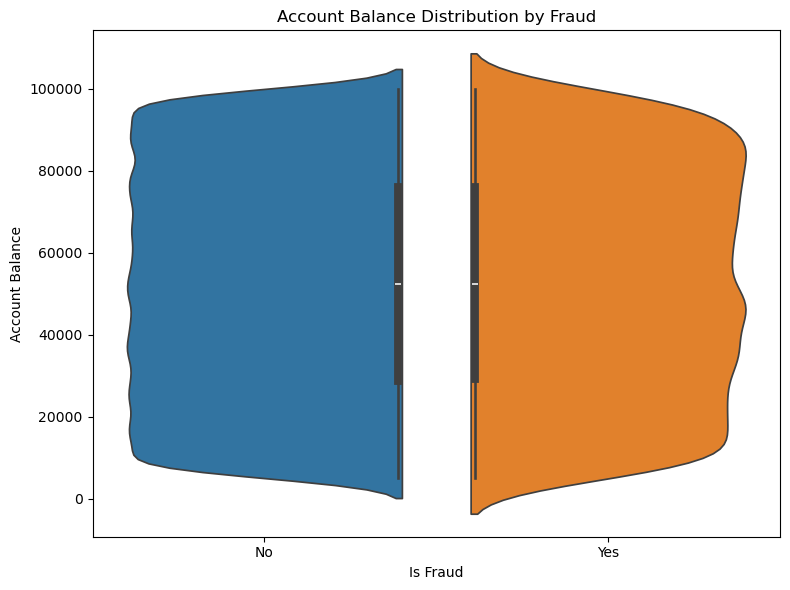

In [9]:
fraud_labels = {0: 'No', 1: 'Yes'}
plt.figure(figsize=(8, 6))
ax = sns.violinplot(
    data=df.assign(Is_Fraud=lambda x: x['Is_Fraud'].map(fraud_labels)),
    x="Is_Fraud",
    y="Account_Balance",
    hue="Is_Fraud",
    split=True,
    legend=False
)
ax.set_title("Account Balance Distribution by Fraud")
ax.set_xlabel('Is Fraud')
ax.set_ylabel('Account Balance')
plt.tight_layout()
plt.show()

#### Summary:
Confirmed cases of fraud seem to cover more of the extremes of account balance, including reported fraud at a \\$0 balance and a \\$100,000 balance. Reported fraud also seems slightly more weighted to balances under \\$60,000, which could prove usefull in predicting possible fraud.

### Transaction Time vs. Fraud Rate
##### *Is the time of the transaction related to the likelihood of a particular transaction being fraudlent?*

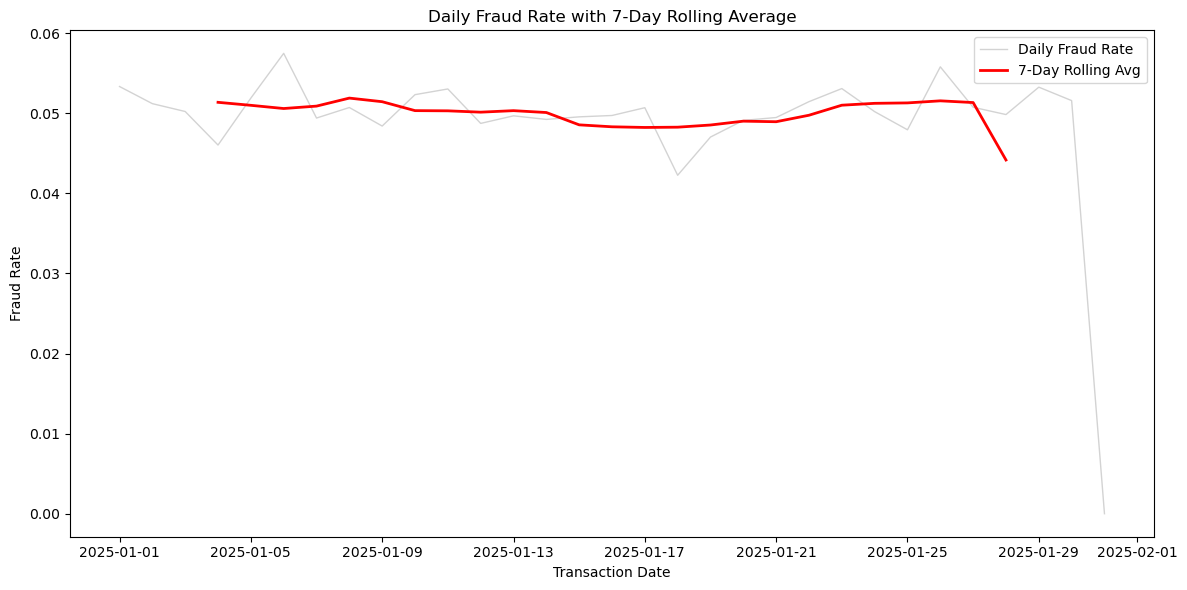

AUC (amount only):  0.503
AUC (amount+hour): 0.502


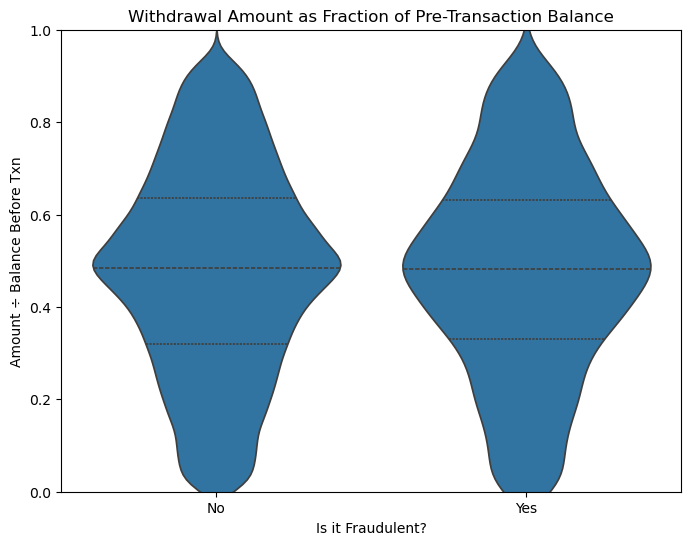

Average hour (fraud): 11.431601903251387
Avg time for all transactions: 11.49042


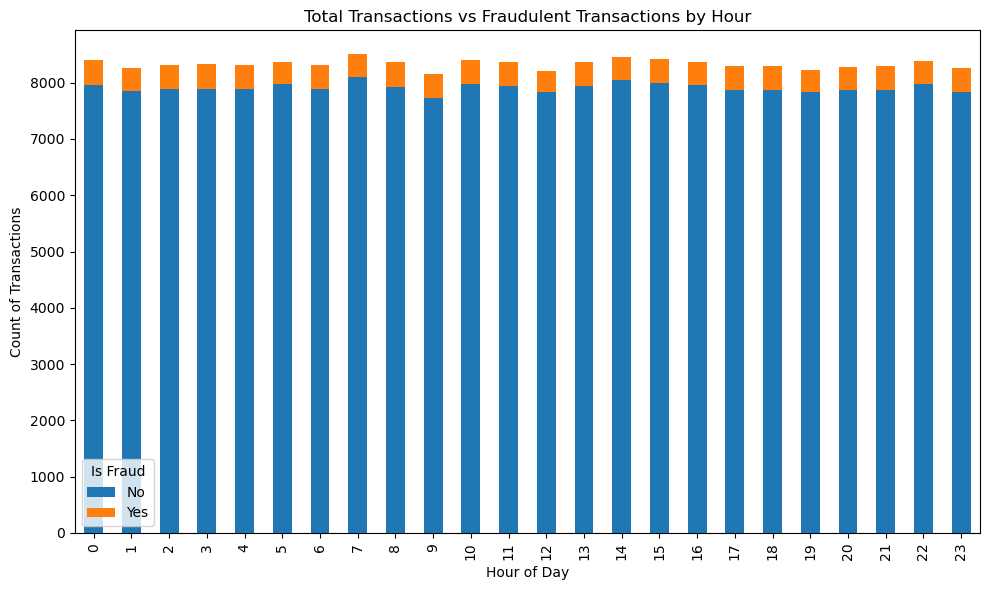

In [10]:
from Exploratory.trans_date_time_amount_balance_exploratory import  transform_features
import pandas as pd
CLEANED: pd.DataFrame = pd.read_csv('Cleaned_Fraud.csv')
CLEANED = transform_features(df=CLEANED)
fraud_by_transaction_time = CLEANED.groupby(['Hour', 'Is_Fraud']).size().unstack(fill_value=0)  
fraud_by_transaction_time.plot(
    kind='bar', 
    stacked=True,
    figsize=(10, 6)
)
plt.title("Total Transactions vs Fraudulent Transactions by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count of Transactions")
plt.legend(title="Is Fraud")
plt.tight_layout()
#plt.show()
fraud_only = CLEANED[CLEANED['Is_Fraud'] == 'Yes']
mean_fraud_hour = fraud_only['Hour'].mean()

print("Average hour (fraud):", mean_fraud_hour)

mean_all_trans = CLEANED['Hour'].mean()
print("Avg time for all transactions:", mean_all_trans)
df_fraud = CLEANED[CLEANED['Is_Fraud'] == 'Yes']
plt.show()

#### Summary
We can see that the proportion of fraudulent transactions changes minimally hour-to-hour, demonstrating that the hour of the day alone is not a useful indicator to tell us whether or not any given transaction is likely to be fraudulent.  
Additionally, the means displayed above the plot, for the average time of a fraudulent transaction vs the average time for any given transaction are nearly the same, showing no shift in the central tendency.

### Transaction Day vs. Fraudulence
##### *Is the date of the transaction related to the likelihood of a particular transaction being fraudlent?*

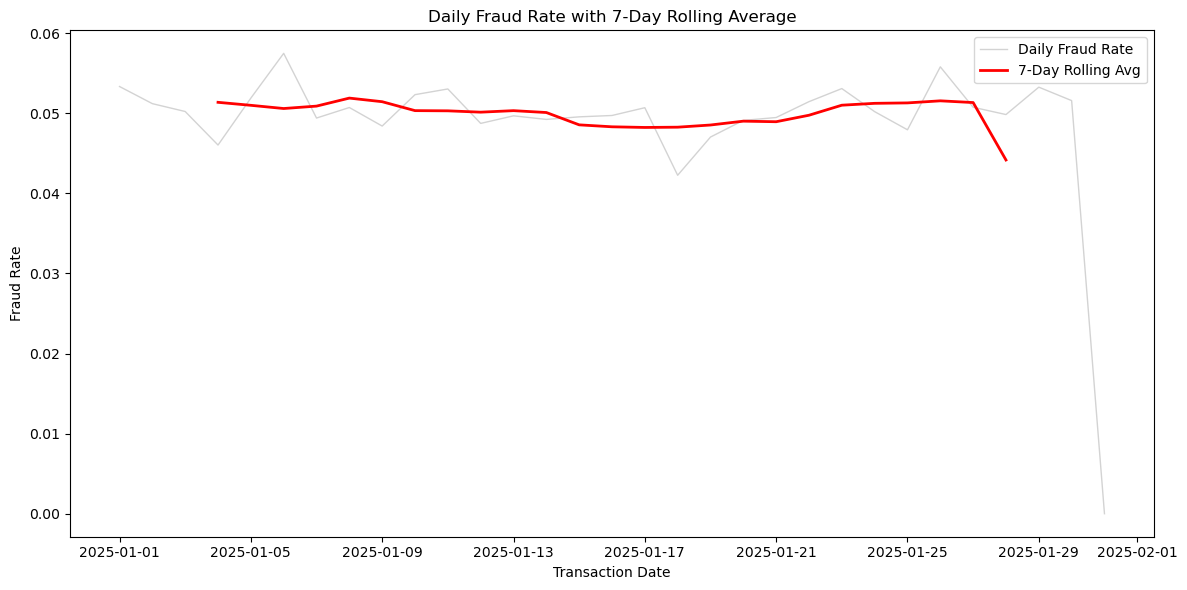

In [11]:
daily_summary = CLEANED.groupby('Transaction_Date').agg(
    total_transactions=('Transaction_Date', 'count'),
    fraud_transactions=('Is_Fraud', lambda x: (x == 'Yes').sum())
).reset_index()
daily_summary['fraud_rate'] = (
    daily_summary['fraud_transactions'] 
    / daily_summary['total_transactions']
)

daily_summary = daily_summary[daily_summary['total_transactions'] > 0]

daily_summary['fraud_rate_7d'] = (
    daily_summary['fraud_rate']
    .rolling(window=7, center=True)
    .mean()
)

plt.figure(figsize=(12, 6))

# raw daily rate in light grey
sns.lineplot(
    data=daily_summary,
    x='Transaction_Date',
    y='fraud_rate',
    color='lightgray',
    linewidth=1,
    label='Daily Fraud Rate',
    marker=None
)

# smoothed 7-day average in red
sns.lineplot(
    data=daily_summary,
    x='Transaction_Date',
    y='fraud_rate_7d',
    color='red',
    linewidth=2,
    label='7-Day Rolling Avg'
)

plt.xlabel("Transaction Date")
plt.ylabel("Fraud Rate")
plt.title("Daily Fraud Rate with 7-Day Rolling Average")
plt.legend()
plt.tight_layout()
plt.show()

#### Summary
The daily fraud rate (light gray) fluctuates around 5 percent throughout January, with no sustained spikes or drops on any particular days. The 7-day rolling average (red) smooths out the noise and stays within a tight band, from about 4.8% in the middle of January to roughly 5.2% at the end, only minor, short-lived dips and recoveries. Overall, there’s no clear upward or downward trend in fraud rate over time, confirming that the calendar date by itself provides little predictive power for identifying fraudulent transactions.


### Transaction Amount vs Fraudulence
##### *Is the transaction amount related to the likelihood of a particular transaction being fraudlent?*

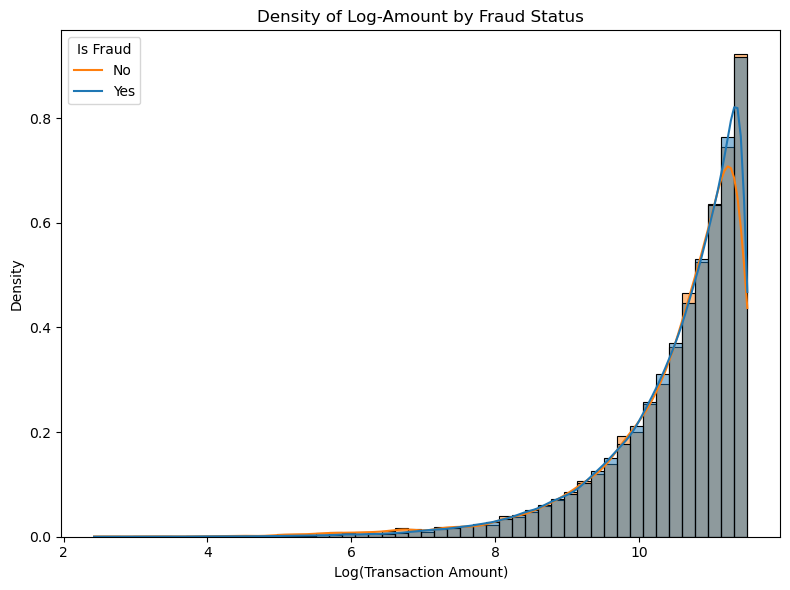

In [12]:
import numpy as np


df = CLEANED.copy()
df['LogAmt'] = np.log1p(df['Transaction_Amount'])

plt.figure(figsize=(8,6))
sns.histplot(
    data=df,
    x='LogAmt',
    hue='Is_Fraud',
    bins=50,
    stat='density',       
    common_norm=False,     
    kde=True,              
    alpha=0.5
)
plt.xlabel('Log(Transaction Amount)')
plt.ylabel('Density')
plt.title('Density of Log-Amount by Fraud Status')
plt.legend(title='Is Fraud', labels=['No','Yes'])
plt.tight_layout()
plt.show()

#### Summary
Fraud and non-fraud transaction sizes (on a log scale) have almost identical density curves for the bulk of amounts, diverging only in the extreme high tail where fraud is slightly more common. This shows us that amount alone provides only a weak signal except for the very largest transactions.

### Transaction Time & Amount vs Fraudulence
#### *Are the features 'transaction time' and 'transaction amount', when used together, indicative of any trend related to fraud?*

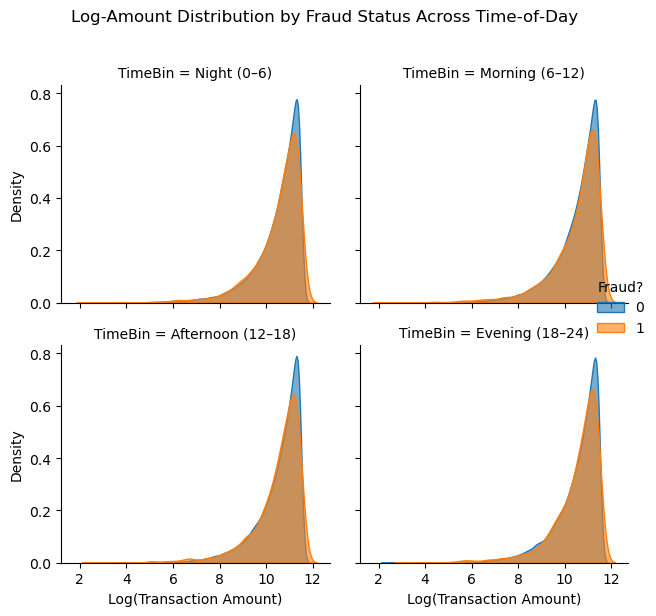

In [13]:
import numpy as np

df = pd.read_csv('Cleaned_Fraud.csv', parse_dates=['Transaction_Date'])
# log‐amount
df['LogAmt'] = np.log1p(df['Transaction_Amount'])
# hour as integer
df['Hour']   = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S').dt.hour

bins = [0, 6, 12, 18, 24]
labels = ['Night (0–6)','Morning (6–12)','Afternoon (12–18)','Evening (18–24)']
df['TimeBin'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=False)

# 3) Faceted KDE
g = sns.FacetGrid(
    df, 
    col='TimeBin', 
    hue='Is_Fraud', 
    sharex=True, 
    sharey=True, 
    col_wrap=2, 
    height=3
)
g.map(sns.kdeplot, 'LogAmt', fill=True, common_norm=False, alpha=0.6)
g.add_legend(title='Fraud?')
g.set_axis_labels('Log(Transaction Amount)', 'Density')
g.fig.suptitle('Log-Amount Distribution by Fraud Status Across Time‐of‐Day', y=1.02)
plt.tight_layout()
plt.show()


#### Summary
The chart above plots the density of fraudulent and legitimate transactions based on the log of the transaction amount. It incorporates the time of day as well, seperating the times into four quartiles to see if the density distributions fluctuate or vary depending on the time of hte transaction.   

Across all four time‐of‐day bins, the logged transaction‐amount distributions for fraud vs. non-fraud nearly perfectly overlap. Fraud only edges out in the extreme tail. This pattern holds at night, morning, afternoon, and evening. In other words, transaction amount remains the only weak signal (in the far tail) and time of day isn't really indicative of the likelihood of a transaction being fraudulent.

### Account Balance & Transaction Amount vs Fraudulence
#### *Does the proportion of the balance drained on a transaction indicate anything about the likelihood of a transaction being fraudulent?*

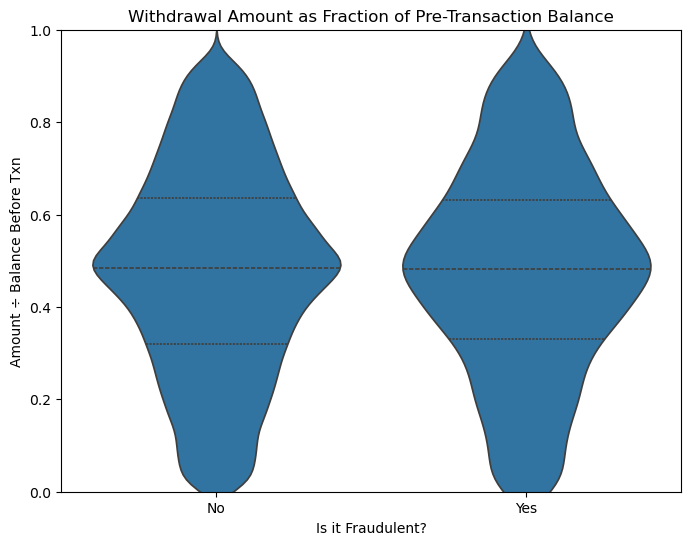

In [14]:
df2 = CLEANED.copy()

# for withdrawals/transfers, the new balance = old_balance – amount
# so old_balance = new_balance + amount
mask_w = df2['Transaction_Type'].isin(['Withdrawal','Transfer'])
df2.loc[mask_w,   'Bal_Pre'] = df2.loc[mask_w,   'Account_Balance'] + df2.loc[mask_w,   'Transaction_Amount']

mask_d = df2['Transaction_Type']=='Deposit'
df2.loc[mask_d,   'Bal_Pre'] = df2.loc[mask_d,   'Account_Balance'] - df2.loc[mask_d,   'Transaction_Amount']
df2['Amt_to_PreBal'] = df2['Transaction_Amount'] / (df2['Bal_Pre'] + 1e-6)
plt.figure(figsize=(8,6))
sns.violinplot(
    data=df2, 
    x='Is_Fraud', 
    y='Amt_to_PreBal',
    inner='quartile',
    scale='width'
)
plt.ylim(0,1)   
plt.title('Withdrawal Amount as Fraction of Pre-Transaction Balance')
plt.ylabel('Amount ÷ Balance Before Txn')
plt.xlabel('Is it Fraudulent?')
plt.show()

#### Summary
Fraudulent and legitimate withdrawals draw almost the same fraction of the prior balance. Their medians both sit near 0.5 and their interquartile ranges nearly are almost one to one, showing that relative withdrawal size alone is not a useful indicator of fraud.

## Machine Learning

### XGBoost

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve, fbeta_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load in data
xg_bank_fraud_df = pd.read_csv('Bank_Transaction_Fraud_Detection.csv')

ModuleNotFoundError: No module named 'xgboost'

#### Data Cleaning - (XGB Specific)

In [ ]:
# Format time and date to be usable
xg_bank_fraud_df['Transaction_Date'] = pd.to_datetime(xg_bank_fraud_df['Transaction_Date'], format='%d-%m-%Y', dayfirst=True)
xg_bank_fraud_df['Transaction_Time'] = pd.to_datetime(xg_bank_fraud_df['Transaction_Time'], format='%H:%M:%S', errors='coerce')

# Transaction_Date
xg_bank_fraud_df['Year'] = xg_bank_fraud_df['Transaction_Date'].dt.year
xg_bank_fraud_df['Month'] = xg_bank_fraud_df['Transaction_Date'].dt.month
xg_bank_fraud_df['Day'] = xg_bank_fraud_df['Transaction_Date'].dt.day
xg_bank_fraud_df['Weekday'] = xg_bank_fraud_df['Transaction_Date'].dt.weekday

# Transaction_Time
xg_bank_fraud_df['Hour'] = xg_bank_fraud_df['Transaction_Time'].dt.hour
xg_bank_fraud_df['Minute'] = xg_bank_fraud_df['Transaction_Time'].dt.minute

# Gender
xg_bank_fraud_df['Gender'] = xg_bank_fraud_df['Gender'].map({
    'Male' : 1, 'Female': 0
})

# Age
age_bins = [0, 25, 40, 60, 120]
labels = ['less25','26-40','41-60','60plus']
xg_bank_fraud_df['Age_Group'] = pd.cut(xg_bank_fraud_df['Age'], bins=age_bins, labels=labels)
xg_bank_fraud_df = pd.get_dummies(xg_bank_fraud_df, columns=['Age_Group'], prefix='AgeGrp')

# Account_Type
xg_bank_fraud_df['Account_Type'] = xg_bank_fraud_df['Account_Type'].map({
    'Savings' : 0, 'Business' : 1, 'Checking' : 2, 
})

# Transaction_Type
xg_bank_fraud_df['Transaction_Type'] = xg_bank_fraud_df['Transaction_Type'].map({
    'Transfer' : 0, 'Bill Payment' : 1, 'Debit' : 2, 'Withdrawal' : 3, 'Credit' : 4,
})

# Merchant_Category
xg_bank_fraud_df['Merchant_Category'] =  xg_bank_fraud_df['Merchant_Category'].map({
    'Restaurant' : 0, 'Groceries' : 1, 'Entertainment' : 2, 'Health' : 3, 'Clothing' : 4, 'Electronics' : 5, 
})

# Account_Balance
xg_bank_fraud_df['Amt_Trans_to_Bal_Ratio'] = xg_bank_fraud_df['Transaction_Amount'] / (xg_bank_fraud_df['Account_Balance'] + 1)

# Transaction_Description
keyword_flags = [
    'ATM','Bitcoin','Cryptocurrency','Online','Refund', 'POS','Transfer',
    'Subscription','Electronics','Gift','Charity','Rental','Taxi', 'Penalty', 'Pharmacy', 'Luxury'
    ]

for kw in keyword_flags:
    col_name = f'Desc_Has_{kw}'
    # Check if keyword exists (case-insensitive), handle NaN values
    xg_bank_fraud_df[col_name] = (
        xg_bank_fraud_df['Transaction_Description']
        .str.contains(kw, case=False, regex=False)
        .fillna(False)
        .astype(int)
    )

# Frequency encoding: State, City, Bank_Branch, Transaction_Device, Device_Type
# Included this type of encoding because of the number of unique values is a lot
for column in ['State', 'City', 'Bank_Branch', 'Transaction_Device', 'Device_Type']:
    freq_map = xg_bank_fraud_df[column].value_counts().to_dict()
    xg_bank_fraud_df[column] = xg_bank_fraud_df[column].map(freq_map)

# Getting rid of non categorical/informative variabless
xg_bank_fraud_df.drop(['Customer_Name', 'Transaction_ID', 'Transaction_Currency', 
                       'Transaction_Location', 'Customer_Contact', 'Customer_Email', 
                       'Customer_ID', 'Merchant_ID', 'Transaction_Date', 'Transaction_Time', 
                       'Transaction_Description'], 
                       axis=1, 
                       inplace=True)

#### Setting Up Data for Modeling

In [ ]:
# Is_Fraud is what we want to predict
y = xg_bank_fraud_df['Is_Fraud']
x = xg_bank_fraud_df.drop(['Is_Fraud'], axis=1)

# Found StandardScaler to standardize all numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Used smote for resampling, giving new synthetic rows to help even out fraud/non-fraud
smote = SMOTE(random_state=3870)
X_resampled, y_resampled = smote.fit_resample(x, y)

#Split data 80/20
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=3870, stratify=y_resampled)

#### Make and Fit the Model

In [ ]:
# Initialize model
xg_model = XGBClassifier(
    n_estimators=300,
    max_depth=12,
    learning_rate=0.1,
    eval_metric='logloss',
    subsample=0.7,
    scale_pos_weight=1, 
    random_state=3870
)

# Fit model
xg_model.fit(X_train, y_train)

#### Results

In [ ]:
# Find the optimal threshold for precision/recall curve
y_prob = xg_model.predict_proba(X_test)[:, 1]

# Plot ROC Curve
fpr, tpr, roc_th = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Plot Precision/Recall curve
precision, recall, threshold = precision_recall_curve(y_test, y_prob)
plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(" Curve")
plt.show()

valid = np.where(recall[:-1] >= 0.8)[0]
best_idx = valid[np.argmax(precision[valid])]
threshold = threshold[best_idx]

# Prediction w/ balanced_threshold
y_pred_optimized = (y_prob >= threshold).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_optimized, zero_division=0))
print("Confusion Matrix:")
print(pd.crosstab(y_test, y_pred_optimized, 
                 rownames=['Actual'], 
                 colnames=['Predicted'], 
                 margins=True))



#### XGBoost Summary

## Summary and Conclusions
Insert summary here

## Limitations and Recommendations for future work.
Insert here